In [18]:
import yaml
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

## Inception score

In [60]:
reports = Path("../reports/is_score/")
figures = Path("../figures/is_score/")

figures.mkdir(parents=True, exist_ok=True)

scores = []
for file in reports.glob("is_scores-version_*.yml"):
    version = int(file.stem.split("-")[-1].split("_")[-1])
    with file.open("r") as fp:
        sc = yaml.load(fp, yaml.Loader)
        sc["version"] = version
        scores.append(pd.DataFrame(sc))
scores = pd.concat(scores).sort_values(by=["version", "epoch"])
scores.head()

,epoch,is_mean,is_std,version
62,14.0,1.962998,0.014663,0
29,29.0,1.962304,0.011274,0
45,44.0,1.982288,0.009515,0
26,59.0,2.134907,0.012495,0
35,74.0,2.034473,0.016765,0


/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


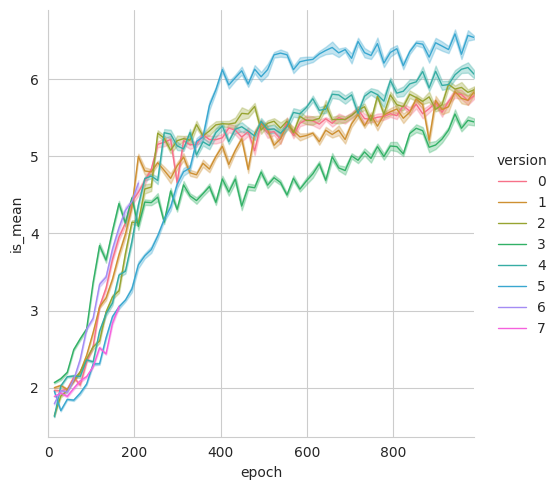

In [20]:
def fill_between(x, mean, std, **kwargs):
    upper = mean - std
    lower = mean + std
    plt.fill_between(x, lower, upper, **kwargs)


g = sns.FacetGrid(
    data=scores, hue="version", palette="husl", height=5, xlim=(0, scores.epoch.max())
)
g.map(sns.lineplot, "epoch", "is_mean", lw=1)
g.add_legend()
g.map(fill_between, "epoch", "is_mean", "is_std", alpha=0.3)

## Decoded syllables

In [63]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [64]:
early_classes = ['EARLY_1120', 'EARLY_184', 'EARLY_2255', 'EARLY_42561', 'EARLY_7370', 'EARLY_7401', 'EARLY_False']
ot_classes = ['OT_79442', 'OT_80795', 'OT_57765', 'OT_64718']
real_classes = ['A', 'B1', 'B2', 'C', 'D', 'E', 'H', 'J1', 'J2', 'L', 'N', 'O', 'Q', 'R', 'V', 'M']
noise_class = ['WN']
syll_classes = real_classes + early_classes + ot_classes + noise_class

In [65]:
decoded_dir = Path("../reports/decoded_gan")

figures = Path("../figures/decoded_gan/")

figures.mkdir(parents=True, exist_ok=True)

decoded = []
for decoded_file in sorted(decoded_dir.glob("*.csv")):
    version = int(decoded_file.stem.split("-")[-1].split("_")[-1])
    d = pd.read_csv(decoded_file, index_col=0)
    d["version"] = version
    decoded.append(d)

decoded = pd.concat(decoded).sort_values(by=["version", "epoch"])
decoded = decoded.replace((np.inf, -np.inf), 0.0)
decoded = decoded.fillna(0)

In [66]:
decoded["X"] = decoded[early_classes + ot_classes + noise_class].sum(axis=1).astype(int)
decoded["EARLY"] = decoded[early_classes].sum(axis=1).astype(int)
decoded["OT"] = decoded[ot_classes].sum(axis=1).astype(int)
decoded["REAL"] = decoded[real_classes].sum(axis=1).astype(int)

In [67]:
decoded["Mean X"] = decoded[early_classes + ot_classes + noise_class].mean(axis=1).astype(int)
decoded["Mean REAL"] = decoded[real_classes].mean(axis=1).astype(int)

In [68]:
decoded["Median X"] = decoded[early_classes + ot_classes + noise_class].median(axis=1).astype(int)
decoded["Median REAL"] = decoded[real_classes].median(axis=1).astype(int)

In [86]:
decoded["Std. syll"] = decoded[["X"] + real_classes].std(axis=1).astype(int)

In [70]:
decoded["Class count > 0"] = decoded[real_classes].apply(lambda x: x > 0).sum(axis=1)
decoded["Class count > 100"] = decoded[real_classes].apply(lambda x: x > 100).sum(axis=1)
decoded["Class count > 1000"] = decoded[real_classes].apply(lambda x: x > 1000).sum(axis=1)

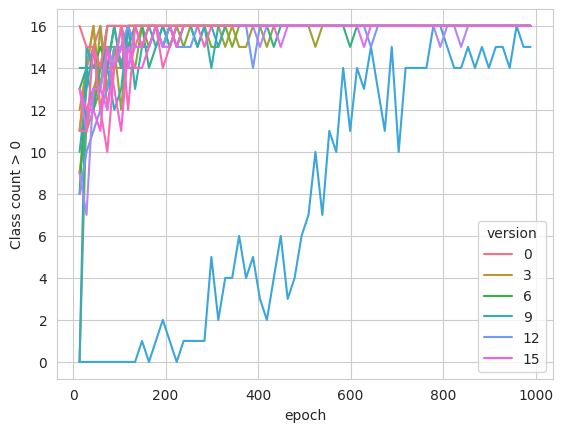

In [71]:
sns.lineplot(data=decoded, x="epoch", y="Class count > 0", hue="version", palette="husl")
plt.savefig(figures / "real_syll_counts_thr0.png", bbox_inches="tight")

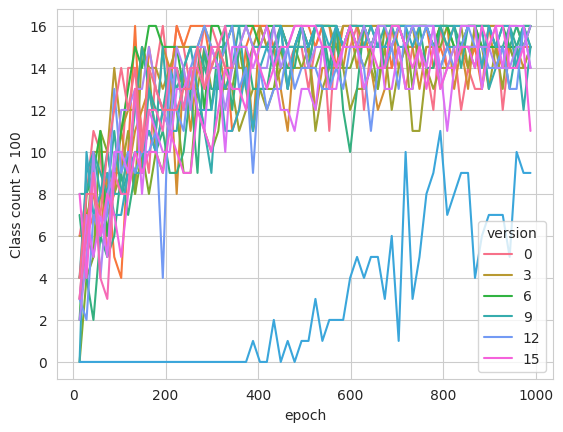

In [72]:
sns.lineplot(data=decoded, x="epoch", y="Class count > 100", hue="version", palette="husl")
plt.savefig(figures / "real_syll_counts_thr100.png", bbox_inches="tight")

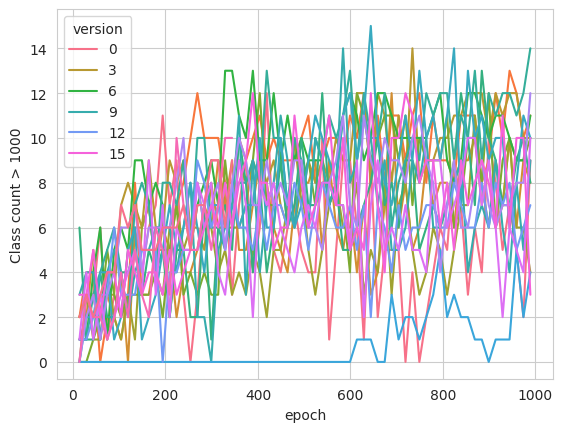

In [73]:
sns.lineplot(data=decoded, x="epoch", y="Class count > 1000", hue="version", palette="husl")
plt.savefig(figures / "real_syll_counts_thr1000.png", bbox_inches="tight")

**is_mean is computed including GAN classes !!!**

/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


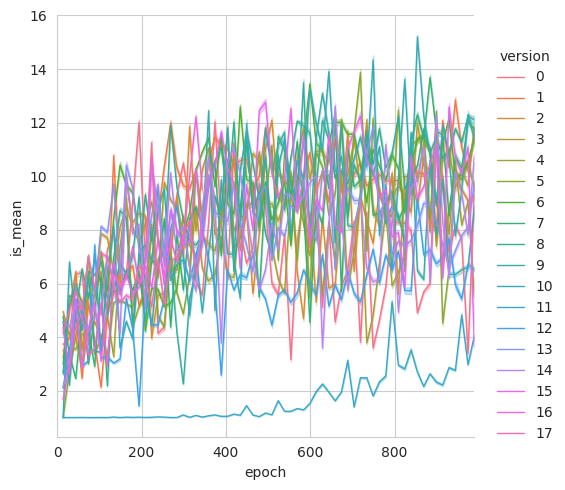

In [74]:
def fill_between(x, mean, std, **kwargs):
    upper = mean - std
    lower = mean + std
    plt.fill_between(x, lower, upper, **kwargs)


g = sns.FacetGrid(
    data=decoded, hue="version", palette="husl", height=5, xlim=(0, decoded.epoch.max())
)
g.map(sns.lineplot, "epoch", "is_mean", lw=1)
g.add_legend()
g.map(fill_between, "epoch", "is_mean", "is_std", alpha=0.3)
plt.savefig(figures / "is_mean.png", bbox_inches="tight")

/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


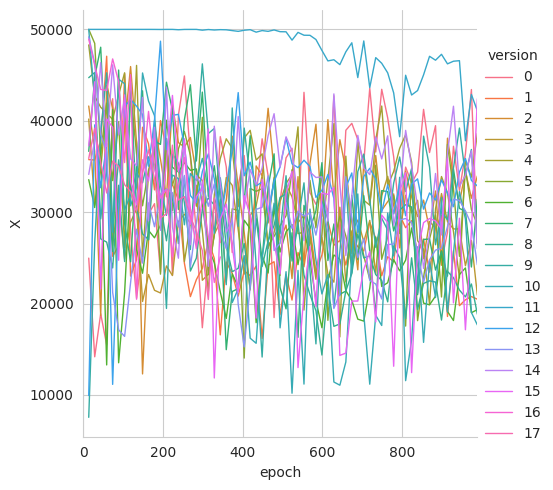

In [75]:
g = sns.FacetGrid(
    data=decoded, 
    palette="husl",
    hue="version",
    height=5,
    xlim=(0, decoded.epoch.max()),
)
g.map(sns.lineplot, "epoch", "X", lw=1)
g.add_legend()
g.set_titles()
plt.savefig(figures / "X_count.png", bbox_inches="tight")

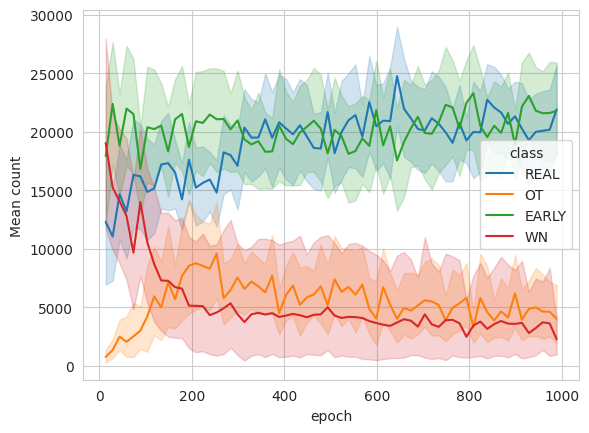

In [76]:
d = pd.melt(decoded, id_vars=["epoch", "version"], value_vars=["REAL", "OT", "EARLY", "WN"], var_name="class", value_name="Mean count")
sns.lineplot(data=d, x="epoch", y="Mean count", hue="class")
plt.savefig(figures / "real_ot_early_wn_count.png", bbox_inches="tight")

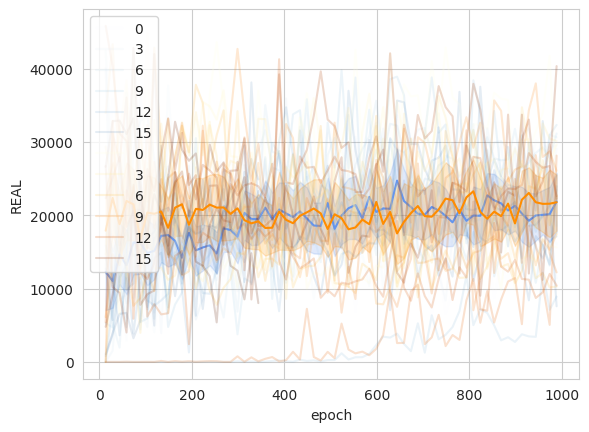

In [77]:
sns.lineplot(data=decoded, x="epoch", y="REAL", hue="version", palette="Blues", alpha=0.1)
sns.lineplot(data=decoded, x="epoch", y="REAL", color="cornflowerblue")
sns.lineplot(data=decoded, x="epoch", y="EARLY", hue="version", palette="YlOrBr", alpha=0.2)
sns.lineplot(data=decoded, x="epoch", y="EARLY", color="darkorange")
plt.savefig(figures / "real_early_count.png", bbox_inches="tight")

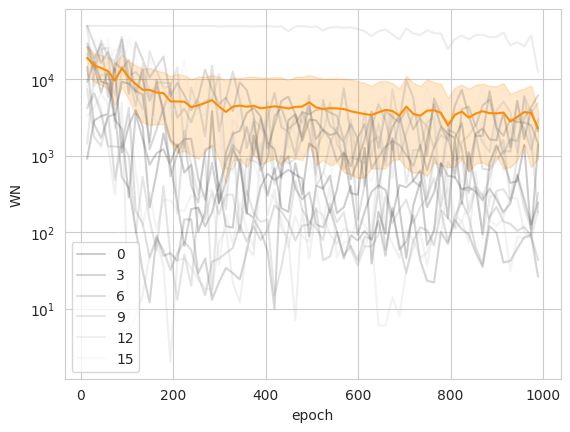

In [78]:
sns.lineplot(data=decoded, x="epoch", y="WN", hue="version", palette="gray", alpha=0.2)
sns.lineplot(data=decoded, x="epoch", y="WN", color="darkorange").set(yscale="log")
plt.savefig(figures / "wn_count.png", bbox_inches="tight")

/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


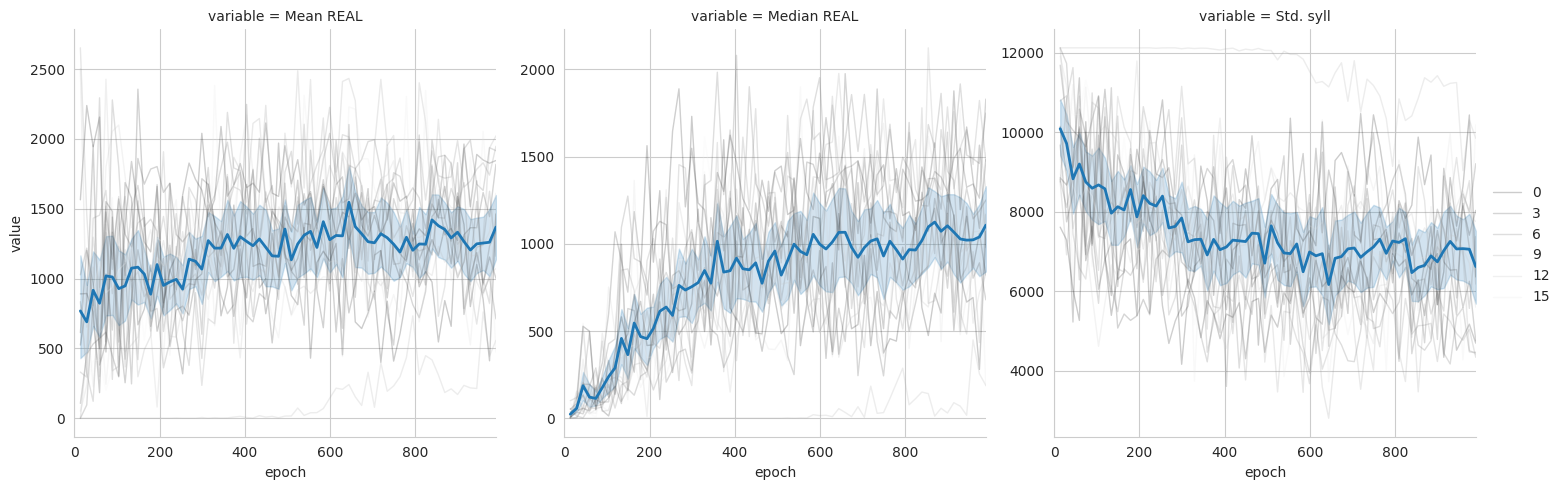

In [87]:
d = pd.melt(decoded, id_vars=["epoch", "version"], value_vars=["Mean REAL", "Median REAL", "Std. syll"], value_name="value")
g = sns.FacetGrid(
    data=d,
    col="variable",
    height=5,
    xlim=(0, decoded.epoch.max()),
    sharey=False,
)
g.map(sns.lineplot, "epoch", "value", "version", palette="gray", lw=1, alpha=0.2)
g.map(sns.lineplot, "epoch", "value", lw=2)

g.add_legend()
g.set_titles()

plt.savefig(figures / "mean_median_real_std_all.png", bbox_inches="tight")

/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/nathan/Documents/Code/perceptuo-motor-seq/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


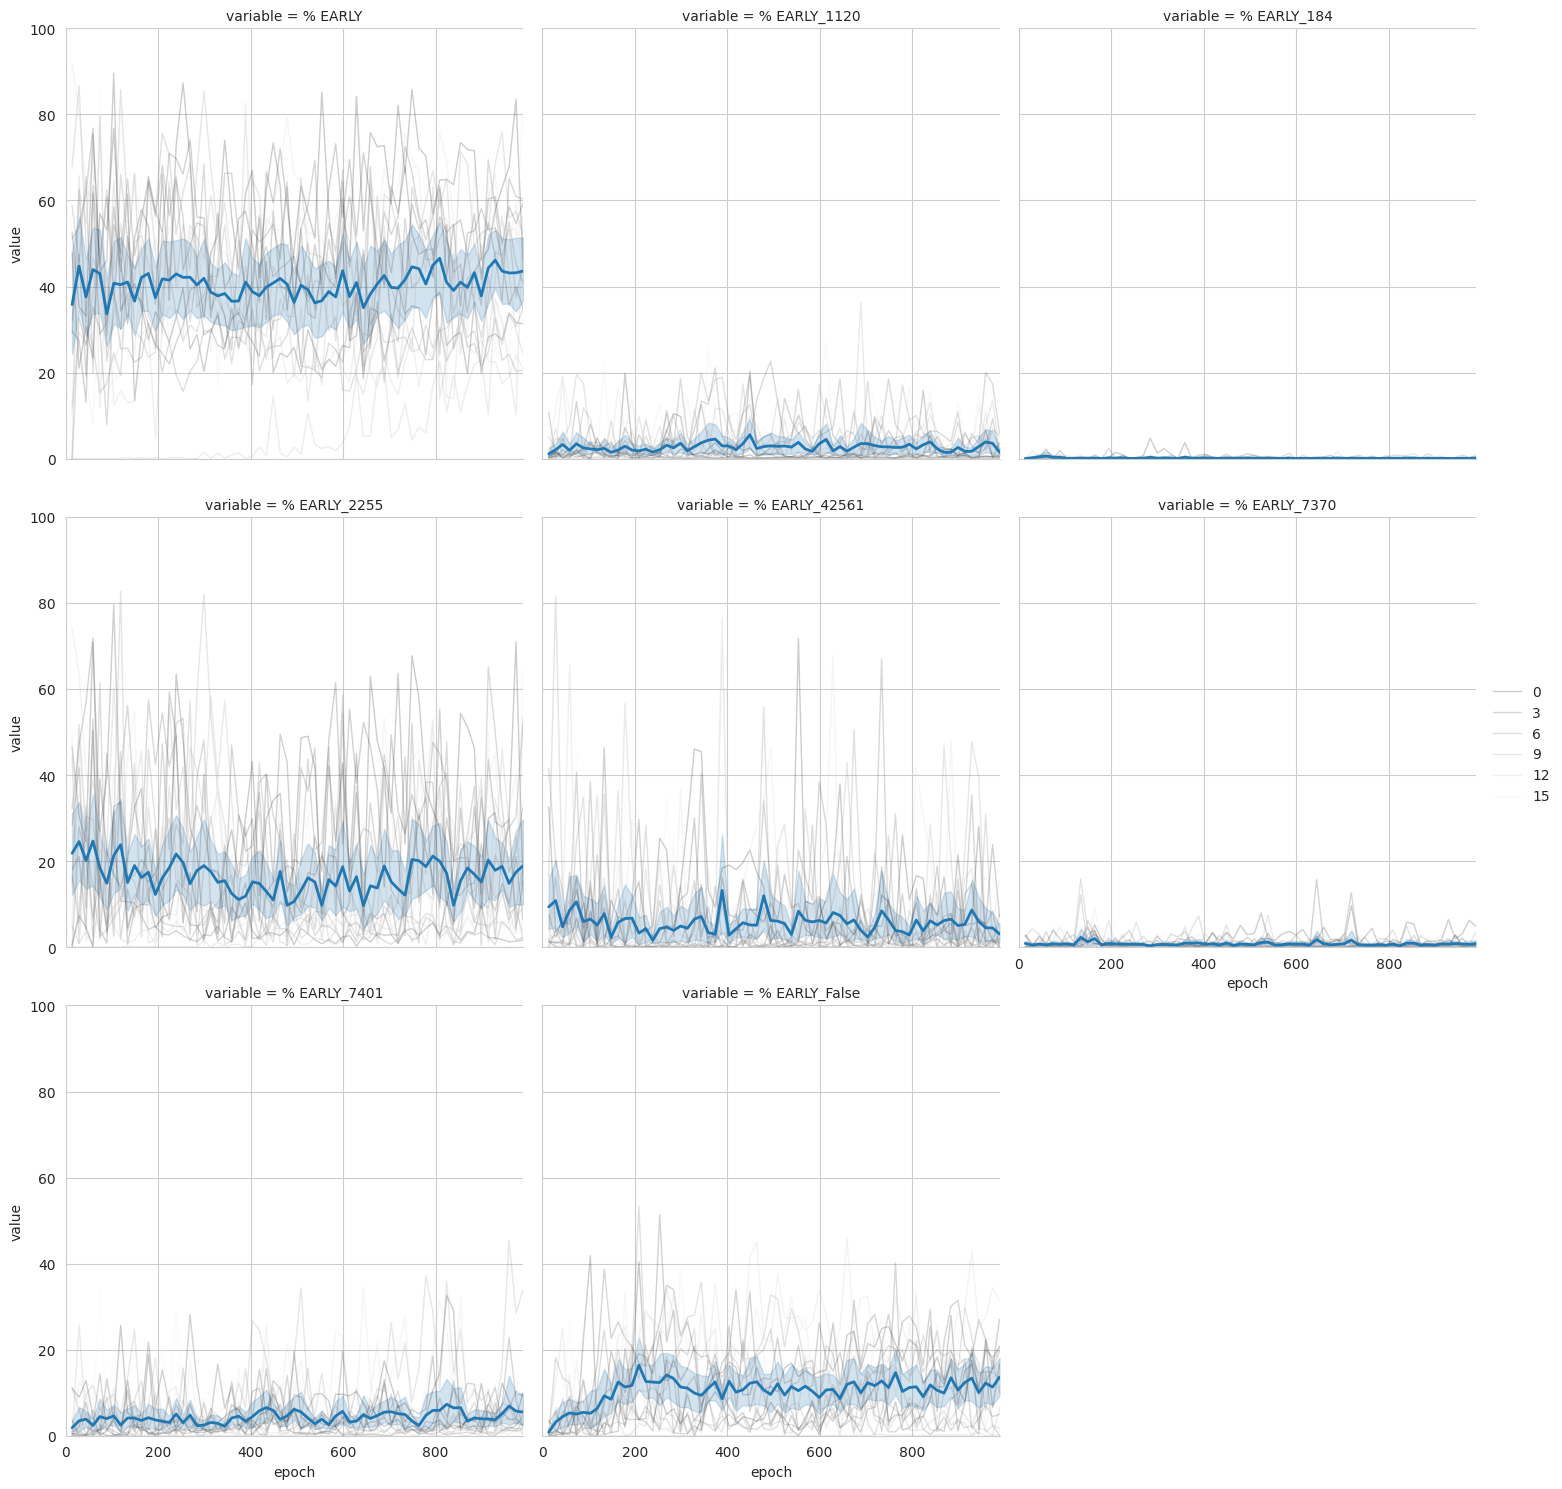

In [83]:
percent_cols = []

decoded["% EARLY"] = decoded["EARLY"] / decoded[syll_classes].sum(axis=1) * 100
percent_cols.append("% EARLY")
for early_cls in early_classes:
    decoded[f"% {early_cls}"] = decoded[early_cls] / decoded[syll_classes].sum(axis=1) * 100
    percent_cols.append(f"% {early_cls}")

d = pd.melt(decoded, id_vars=["epoch", "version"], value_vars=percent_cols, value_name="value")
g = sns.FacetGrid(
    data=d,
    col="variable",
    col_wrap=3,
    height=5,
    xlim=(0, decoded.epoch.max()),
    ylim=(0, 100),
)
g.map(sns.lineplot, "epoch", "value", "version", palette="gray", lw=1, alpha=0.2)
g.map(sns.lineplot, "epoch", "value", lw=2)

g.add_legend()
g.set_titles()

plt.savefig(figures / "early_percents.png", bbox_inches="tight")

KeyboardInterrupt: 

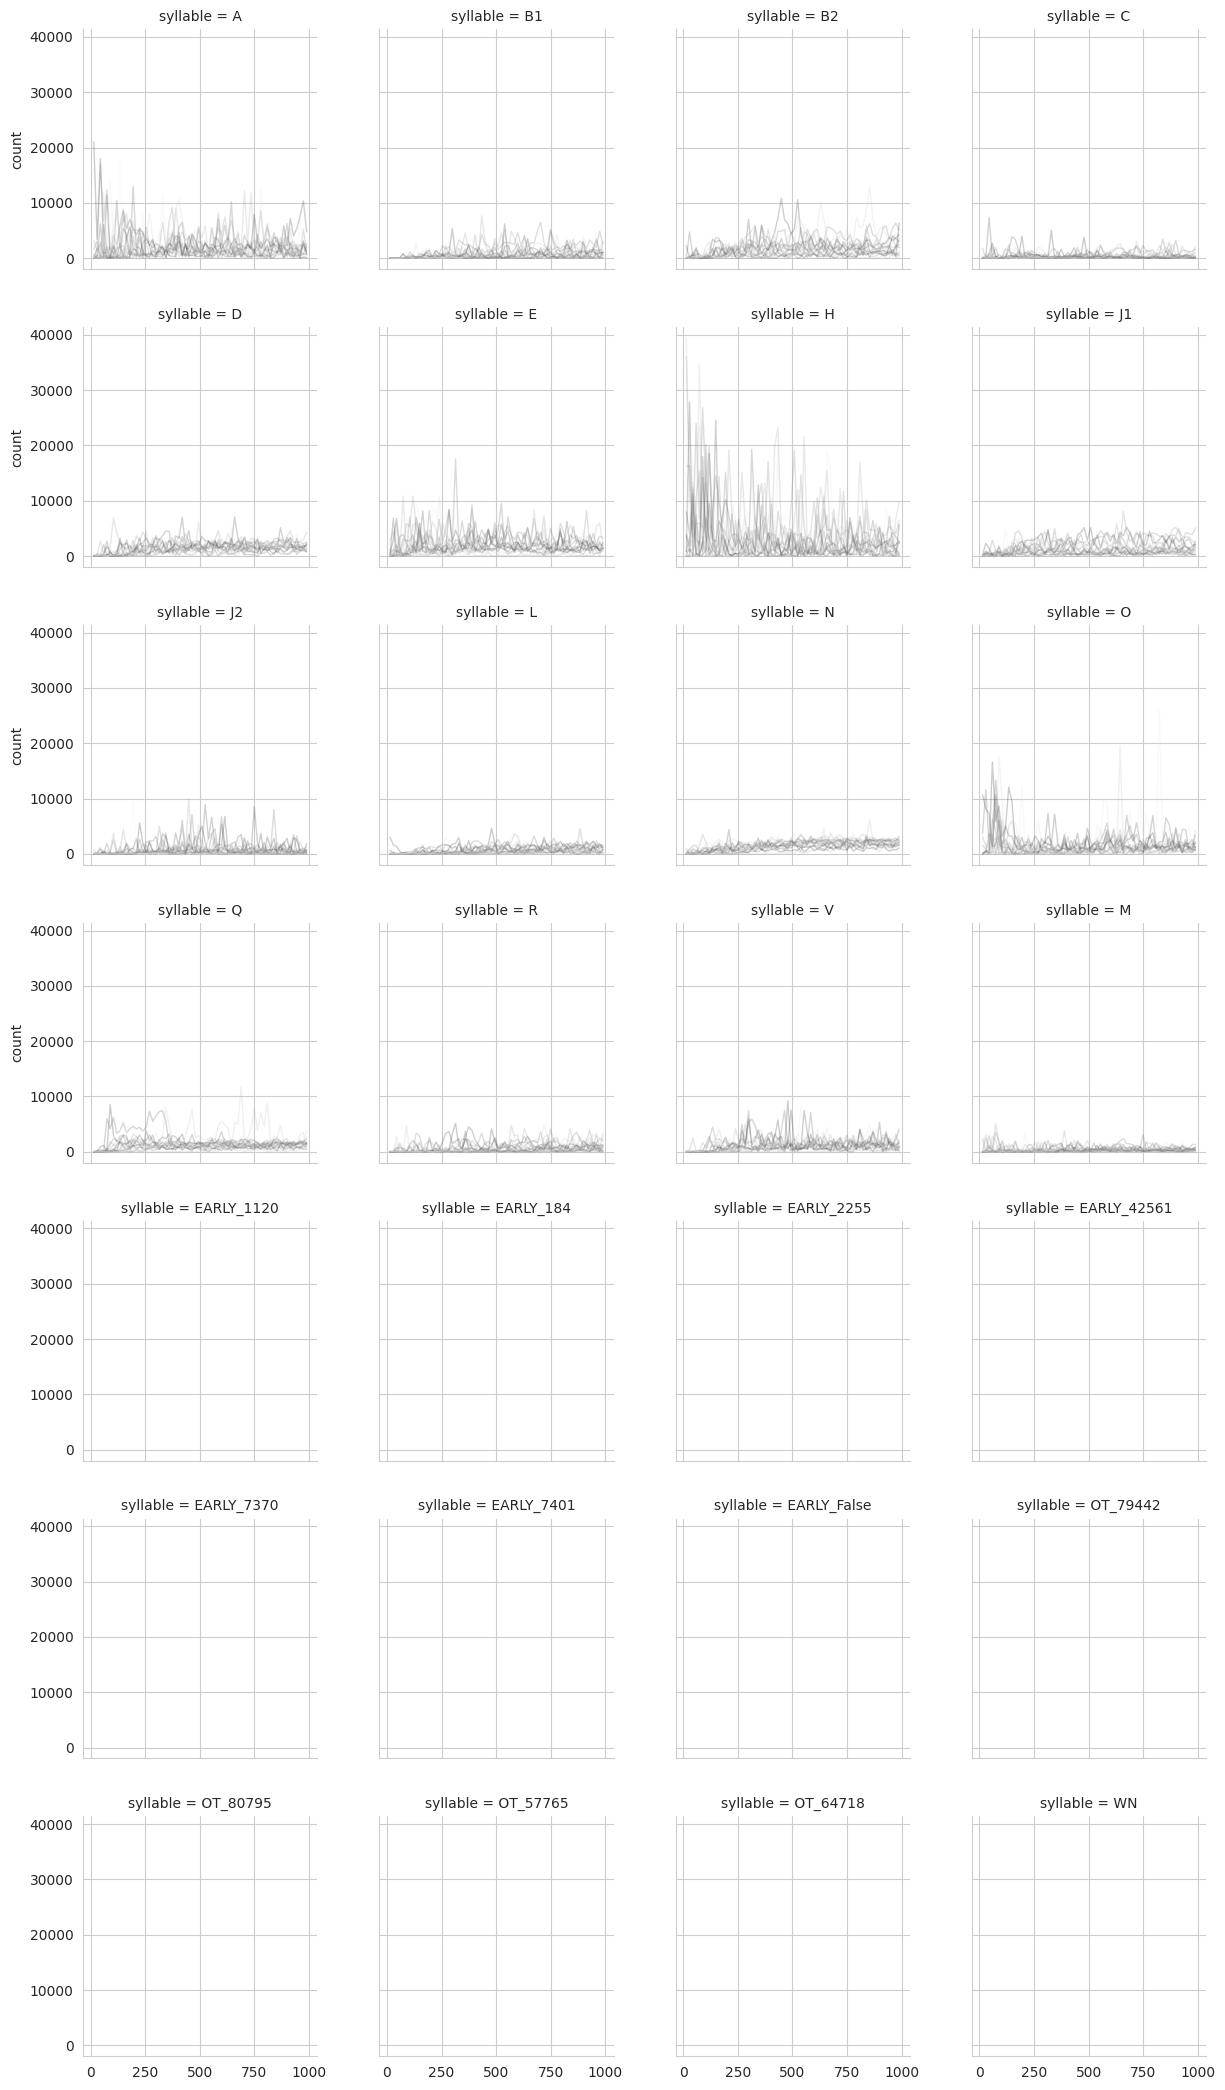

In [85]:
d = pd.melt(decoded, ["epoch", "version"], syll_classes, "syllable", "count")
d["count"] += 1  # to avoid -inf

g = sns.FacetGrid(
    data=d,
    col="syllable",
    col_wrap=4,
    palette="husl",
)
g.map(sns.lineplot, "epoch", "count", "version", palette="gray", lw=1, alpha=0.2)\
    .map(sns.lineplot, "epoch", "count")\
    .set(yscale="log")

plt.savefig(figures / "per_syllable_count.png", bbox_inches="tight")